In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import shutil

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)

In [3]:
os.environ['KERAS_BACKEND']='tensorflow'

import tensorflow as tf
tf.__version__

# ## Use tensorflow with CPU
# import tensorflow as tf
# config = tf.ConfigProto(
#         device_count = {'GPU': 0}
#     )
# sess = tf.Session(config=config)
# from keras import backend as K
# K.tensorflow_backend.set_session(session=sess)

'1.1.0'

In [4]:
sys.path.append(os.path.join(project_common_path, 'models', 'KerasDenseNet'))

## Compare DenseNet 121

In [95]:
from densenet121 import DenseNet

In [94]:
# from models.densenet_multiclassification import get_densenet
from models.densenet import DenseNet as MyDenseNet

In [89]:
dn1 = DenseNet(classes=17, reduction=0.5)
dn1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
data (InputLayer)                (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1_zeropadding (ZeroPadding2D (None, 230, 230, 3)   0           data[0][0]                       
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9408        conv1_zeropadding[0][0]          
____________________________________________________________________________________________________
conv1_bn (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

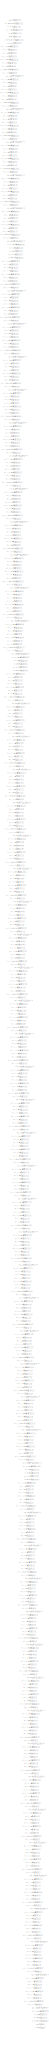

In [87]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(dn1, show_shapes=True).create(prog='dot', format='svg'))

In [100]:
dn2 = MyDenseNet(include_top=True, depth=121, input_shape=(224, 224, 3), classes=17, weights=None)
dn2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_178 (ZeroPadding2 (None, 230, 230, 3)   0           input_4[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9408        zero_padding2d_178[0][0]         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

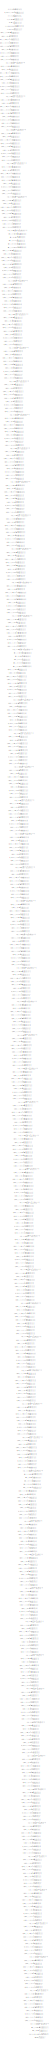

In [99]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(dn2, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
bn_layer = dn1.get_layer(name="conv1_bn")

In [11]:
bn_layer.trainable_weights, bn_layer.non_trainable_weights

([<tf.Variable 'conv1_bn/gamma:0' shape=(64,) dtype=float32_ref>,
  <tf.Variable 'conv1_bn/beta:0' shape=(64,) dtype=float32_ref>],
 [<tf.Variable 'conv1_bn/moving_mean:0' shape=(64,) dtype=float32_ref>,
  <tf.Variable 'conv1_bn/moving_variance:0' shape=(64,) dtype=float32_ref>])

In [1]:
import torch as th
import torchvision as tv

In [2]:
if th.cuda.is_available():
    print("CUDA is available")

CUDA is available


In [3]:
dnt = tv.models.DenseNet(num_classes=17)

In [73]:
for m in dnt.named_modules():
    print(m)

('', DenseNet (
  (features): Sequential (
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu0): ReLU (inplace)
    (pool0): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
    (denseblock1): _DenseBlock (
      (denselayer1): _DenseLayer (
        (norm.1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU (inplace)
        (conv.1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm.2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
        (relu.2): ReLU (inplace)
        (conv.2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer (
        (norm.1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU (inplace)
        (conv.1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
 

In [81]:
from torch.autograd import Variable
from torch import nn
from collections import OrderedDict


def summary(input_size, model):
    """
    from 
    """
    def register_hook(module):
        def hook(module, input, output):
            class_name = str(module.__class__).split('.')[-1].split("'")[0]
            module_idx = len(_summary)

            m_key = '%s-%i' % (class_name, module_idx+1)
            _summary[m_key] = OrderedDict()
            _summary[m_key]['input_shape'] = list(input[0].size())
            _summary[m_key]['input_shape'][0] = -1
            _summary[m_key]['output_shape'] = list(output.size())
            _summary[m_key]['output_shape'][0] = -1

            params = 0
            if hasattr(module, 'weight'):
                params += th.prod(th.LongTensor(list(module.weight.size())))
                if module.weight.requires_grad:
                    _summary[m_key]['trainable'] = True
                else:
                    _summary[m_key]['trainable'] = False
            if hasattr(module, 'bias') and module.bias is not None:
                params += th.prod(th.LongTensor(list(module.bias.size())))
            _summary[m_key]['nb_params'] = params
            _summary['Total params'] += params
#             if _summary[m_key]['trainable']:
#                 _summary['Trainable params'] += params
#             else:
#                 _summary['Non-trainable params'] += params

        if not isinstance(module, nn.Sequential) and \
           not isinstance(module, nn.ModuleList) and not (module == model):
            hooks.append(module.register_forward_hook(hook))

    # check if there are multiple inputs to the network
    if isinstance(input_size[0], (list, tuple)):
        x = [Variable(th.rand(1,*in_size)) for in_size in input_size]
    else:
        x = Variable(th.rand(1,*input_size))

    # create properties
    _summary = OrderedDict()
    _summary['Total params'] = 0
    _summary['Trainable params'] = 0
    _summary['Non-trainable params'] = 0
    hooks = []
    # register hook
    model.apply(register_hook)
    # make a forward pass
    model(x)
    # remove these hooks
    for h in hooks:
        h.remove()

    return _summary

In [83]:
s = summary((3, 224, 224), dnt)

In [84]:
s

OrderedDict([('Total params', 6971281),
             ('Trainable params', 0),
             ('Non-trainable params', 0),
             ('Conv2d-4',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', True),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-5',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', True),
                           ('nb_params', 128)])),
             ('ReLU-6',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-7',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
            

### Try to load weights

In [3]:
# dnt.load_state_dict(model_zoo.load_url(model_urls['densenet121']))

NameError: name 'DenseNet' is not defined

In [2]:
tv.models.densenet121??

In [4]:
dnt = tv.models.densenet121()

In [10]:
with th.cuda.device(0):
    pass

## Compare DenseNet 161

In [105]:
dnt161 = tv.models.DenseNet(num_classes=17, num_init_features=96, growth_rate=48, block_config=(6, 12, 36, 24))

In [106]:
summary((3, 224, 224), dnt161)

OrderedDict([('Total params', 26509553),
             ('Trainable params', 0),
             ('Non-trainable params', 0),
             ('Conv2d-4',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 96, 112, 112]),
                           ('trainable', True),
                           ('nb_params', 14112)])),
             ('BatchNorm2d-5',
              OrderedDict([('input_shape', [-1, 96, 112, 112]),
                           ('output_shape', [-1, 96, 112, 112]),
                           ('trainable', True),
                           ('nb_params', 192)])),
             ('ReLU-6',
              OrderedDict([('input_shape', [-1, 96, 112, 112]),
                           ('output_shape', [-1, 96, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-7',
              OrderedDict([('input_shape', [-1, 96, 112, 112]),
                           ('output_shape', [-1, 96, 56, 56]),
          

In [104]:
dn161 = MyDenseNet(include_top=True, depth=161, input_shape=(224, 224, 3), classes=17, weights=None)
dn161.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_316 (ZeroPadding2 (None, 230, 230, 3)   0           input_6[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 96)  14112       zero_padding2d_316[0][0]         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 96)  384         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
26509553 == 26509553